# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_200_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,2,0.090383,-0.649882,-0.316971,0.177905,-0.953876,0.335641,0.547794,-0.553937,0.110278,...,2.092920,-0.902635,-1.113107,-0.413884,-0.589024,1.206955,-0.300583,0.270012,-0.130936,0.180399
1,1,0.477048,-2.020710,1.091671,1.287272,-0.363761,0.754296,0.507876,0.777283,-1.120030,...,0.697679,0.224512,-1.192957,0.061010,0.960343,0.241303,0.719193,0.983675,-1.161567,-0.246087
2,2,0.635105,-1.455384,1.860401,0.632697,-0.930232,0.295499,0.756204,0.523225,-2.107392,...,0.579307,-1.044159,-1.480045,-0.010595,0.363854,0.695291,-0.760165,0.963433,-1.901634,-0.315921
3,0,0.961507,-2.004696,0.853696,1.317209,-0.583800,1.132528,0.550134,0.217618,-1.552470,...,1.360498,-0.087889,-1.876129,0.023887,0.442273,1.212686,-0.353484,0.908717,-1.918175,-0.237121
4,1,-0.525586,-1.646895,0.137172,0.377502,-0.305213,0.422324,0.282720,-0.810817,-2.396630,...,1.815167,-2.681982,-0.615784,-0.857696,-2.062510,0.060919,-0.826840,1.522230,-1.236770,0.269057


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.090383 -0.649882 -0.316971  0.177905 -0.953876  0.335641  0.547794   
1    0.477048 -2.020710  1.091671  1.287272 -0.363761  0.754296  0.507876   
2    0.635105 -1.455384  1.860401  0.632697 -0.930232  0.295499  0.756204   
3    0.961507 -2.004696  0.853696  1.317209 -0.583800  1.132528  0.550134   
4   -0.525586 -1.646895  0.137172  0.377502 -0.305213  0.422324  0.282720   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.236947 -1.546189  0.735707  0.337749 -0.865903  0.177455  0.514749   
177  0.524165 -2.116409 -0.105561  0.699807 -0.680601  0.442997  0.912442   
178  0.392108 -1.538342  1.038728  0.582032 -0.505431 -0.056508  0.191502   
179 -0.151722 -1.736164  0.687119  0.422451 -0.804183 -0.165308  0.940421   
180  0.356281 -1.524765  0.030108 -0.003902 -0.441868 -0.106647  0.691161   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'random_state':[125],
              'n_estimators': [15, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 14, 16, 20, 30, 40, 50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 14, 16, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [15, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=20, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5362068965517242


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.43243243243243246


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0  0]
 [ 0 25  0]
 [ 0  0 52]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        52

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  4  3]
 [ 4  0  2]
 [ 8  0  5]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 0 0 2 2 2 0 0 1 0 0 0 2 0 1 0 0 0 1 0 2 0 1 0 2 2 0 2 0 0 2 0 0 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.48      0.61      0.54        18
           1       0.00      0.00      0.00         6
           2       0.50      0.38      0.43        13

    accuracy                           0.43        37
   macro avg       0.33      0.33      0.32        37
weighted avg       0.41      0.43      0.41        37



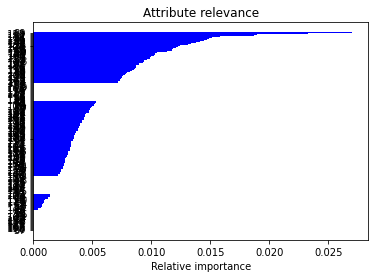

0 = 0.001226140064995298
1 = 0.003229078353354029
2 = 0.0015202891373940482
3 = 0.0019302509634841248
4 = 0.0009067275539220248
5 = 0.0067889382046482
6 = 0.0
7 = 0.0023544475157543966
8 = 0.009379469271957805
9 = 0.006773723196853039
10 = 0.0
11 = 0.0031721137603631364
12 = 0.0
13 = 0.004805663524584406
14 = 0.004332904507110798
15 = 0.007782795155315861
16 = 0.008683020031607766
17 = 0.0008266152593906303
18 = 0.0019132234312145325
19 = 0.011723091125857371
20 = 0.001397232745883087
21 = 0.0
22 = 0.0006378542064455208
23 = 0.006126328100095833
24 = 0.0026688162773871663
25 = 0.001872111504807043
26 = 0.003914969015877705
27 = 0.009353374361055738
28 = 0.002723489112806112
29 = 0.005188548679579663
30 = 0.0026076900096074535
31 = 0.0018742490550330304
32 = 0.006878510455740933
33 = 0.0021251272854499416
34 = 0.0
35 = 0.001554443514432127
36 = 0.013115944691158265
37 = 0.0
38 = 0.011848515676700425
39 = 0.0
40 = 0.004138883702625646
41 = 0.014866317478952512
42 = 0.0031744125554421044


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.